In [66]:
from gensim.models.word2vec import *
from gensim.utils import SaveLoad
from pprint import pprint
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
to_print =['Sąd Najwyższy', 'Trybunał Konstytucyjny', 'kodeks cywilny', 'kpk', 'sąd rejonowy', 'szkoda', 'wypadek', 'kolizja', 'szkoda majątkowa', 'nieszczęście', 'rozwód']
processe_to_print = ["_".join(x.lower().split()) for x in to_print if len(x.split())>1]

In [2]:
word = Word2Vec.load("counted_model")

In [69]:
def pretty_print(to_print, l=3):
    print(to_print)
    print("\n".join(map(lambda t: f"\t{t[0]} : {t[1]}",word.wv.most_similar(positive=to_print.lower().split())[:l])))

In [70]:
for p in to_print:
    pretty_print(p)

Sąd Najwyższy
	sąd_orzekający : 0.7433018684387207
	sąd_ad_quem : 0.7198173999786377
	sąd_a_quo : 0.7081146240234375
Trybunał Konstytucyjny
	trybunał_konstytucyjny : 0.8106153607368469
	sąd_pytający : 0.7542603015899658
	pytający_sąd : 0.7343661785125732
kodeks cywilny
	wa : 0.6284922361373901
	karny : 0.6280282139778137
	lexisnexis : 0.620633602142334
kpk
	pkt_kpk : 0.8205952644348145
	art_kpw : 0.6521388292312622
	kpw : 0.6272209286689758
sąd rejonowy
	sąd_rejonowy : 0.7876675128936768
	sad_rejonowy : 0.7730137705802917
	sąd_meriti : 0.7658076286315918
szkoda
	szkoda_ta : 0.7591339349746704
	szkoda_majątkowa : 0.7117334604263306
	powstała_szkoda : 0.7050179243087769
wypadek
	przedmiotowy_wypadek : 0.5889893770217896
	wypadek_komunikacyjny : 0.5526050329208374
	przypadek : 0.5217757821083069
kolizja
	usterka : 0.7204526662826538
	awaria : 0.6963409781455994
	wyrwa : 0.6861501932144165
szkoda majątkowa
	krzywda : 0.7620128393173218
	szkoda_majątkowa : 0.7000006437301636
	ewentualna_szk

In [71]:
for p in processe_to_print:
    pretty_print(p)

sąd_najwyższy
	sad_najwyższy : 0.7765038013458252
	sn : 0.7689255475997925
	trybunał_konstytucyjny : 0.7193370461463928
trybunał_konstytucyjny
	trybunał : 0.9088258147239685
	pytający_sąd : 0.782455563545227
	sąd_pytający : 0.768673300743103
kodeks_cywilny
	kodeks_pracy : 0.6537402868270874
	cytowany_przepis : 0.6431480646133423
	kodeks_karny : 0.6332970857620239
sąd_rejonowy
	sąd_pierwszej_instancji : 0.8381433486938477
	sad_rejonowy : 0.8361362218856812
	sąd_okręgowy : 0.8233295679092407
szkoda_majątkowa
	krzywda : 0.7167894840240479
	szkoda : 0.711733341217041
	szkoda_niemajątkowa : 0.71006840467453


In [5]:

#     Sąd Najwyższy - kpc + konstytucja
#     pasażer - mężczyzna + kobieta
#     samochód - droga + rzeka
print("Sąd Najwyższy - kpc + konstytucja:")
print("\n".join(map(lambda t: f"\t{t[0]} : {t[1]}", word.wv.most_similar(positive=["sąd_najwyższy", "konstytucja"], negative=["kpc"])[:5])))


Sąd Najwyższy - kpc + konstytucja:
	trybunał_konstytucyjny : 0.6142559051513672
	trybunał : 0.6009151339530945
	ustrojodawca : 0.5717594623565674
	europejski_trybunał_praw_człowieka : 0.560878574848175
	trybunał_sprawiedliwości : 0.5502802729606628


In [6]:
print("pasażer - mężczyzna + kobieta:")
print("\n".join(map(lambda t: f"\t{t[0]} : {t[1]}", word.wv.most_similar(positive=["pasażer", "kobieta"], negative=["mężczyzna"])[:5])))


pasażer - mężczyzna + kobieta:
	pasażerka : 0.7433172464370728
	kierująca : 0.7384593486785889
	kierująca_samochodem : 0.7011879682540894
	piesza : 0.6972338557243347
	kierująca_pojazdem : 0.6786251068115234


In [7]:
print("samochód - droga + rzeka:")
print("\n".join(map(lambda t: f"\t{t[0]} : {t[1]}", word.wv.most_similar(positive=["samochód", "rzeka"], negative=["droga"])[:5])))


samochód - droga + rzeka:
	samochód_marki : 0.5868735313415527
	netbook : 0.5804151892662048
	skuter : 0.5689821243286133
	poprosił_go_aby : 0.5556503534317017
	motocykl : 0.5548390746116638


In [11]:
word_to_plt = ['szkoda', 'strata', 'uszczerbek', 'szkoda majątkowa', 'uszczerbek na zdrowiu', 'krzywda', 'niesprawiedliwość', 'nieszczęście']
processed_words = [x.split() for x in word_to_plt]

In [25]:
bigram = SaveLoad.load("bigram")
trigram = SaveLoad.load("trigram")
list(trigram[bigram[processed_words]])

[['szkoda'],
 ['strata'],
 ['uszczerbek'],
 ['szkoda_majątkowa'],
 ['uszczerbek', 'na', 'zdrowiu'],
 ['krzywda'],
 ['niesprawiedliwość'],
 ['nieszczęście']]

In [61]:
to_plot = [word.wv[t][0] for t in trigram[bigram[processed_words]] if len(t) == 1]
labels = [t[0] for t in trigram[bigram[processed_words]] if len(t) == 1]

In [62]:
X_embedded = TSNE().fit_transform(to_plot)

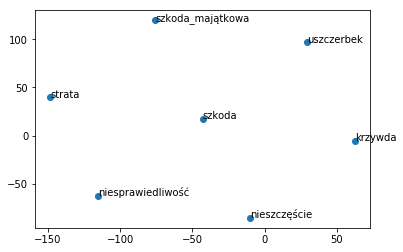

In [63]:
fig, ax = plt.subplots()
ax.scatter(X_embedded[:,1], X_embedded[:,0])

for i, txt in enumerate(labels):
    ax.annotate(txt, (X_embedded[:,1][i],X_embedded[:,0][i]))
plt.show()